Validación cruzada (k-fold)
==========================

La validación cruzada es una técnica de evaluación que se utiliza para evaluar el rendimiento de un modelo de aprendizaje automático. Este método estadístico ayuda a comparar y seleccionar el modelo en el aprendizaje automático aplicado.
Se divide el conjunto de datos en $k$ subconjuntos mutuamente excluyentes. Luego, se entrena el modelo $k$ veces, cada vez utilizando un subconjunto diferente como conjunto de prueba y los otros $k-1$ subconjuntos como conjunto de entrenamiento. El resultado de la validación cruzada es el promedio de los resultados de las $k$ pruebas, con esto podremos analizar si el modelo depende del dataset o si tiene algún sobreajuste.

<center>

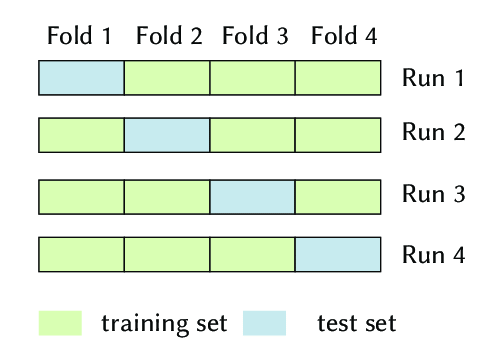

</center>

Implementación
==============

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [2]:
# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

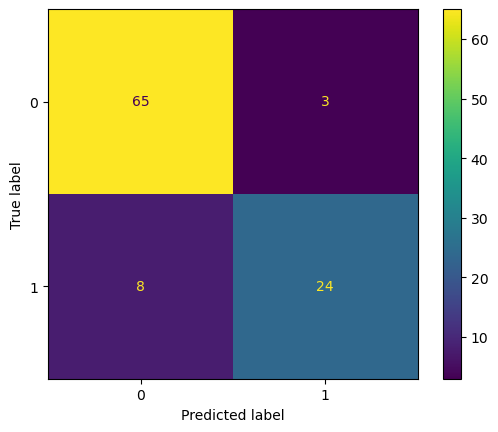

In [3]:
# Entrenamos el clasificador
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

# Predecimos los resultados con el conjunto de testing
Y_pred  = classifier.predict(X_test)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(cm).plot()

In [5]:
# Aplicamos k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.76666667 0.86666667 0.73333333 0.86666667 0.7        0.66666667
 0.83333333 0.93333333 0.96666667 0.9       ]
Accuracy: 82.33 %
Standard Deviation: 9.67 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


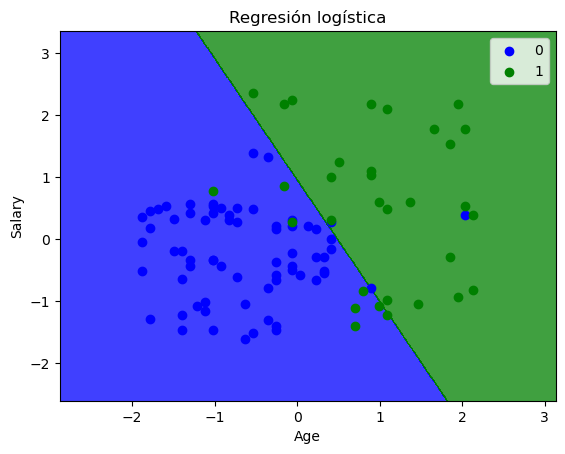

In [6]:
# Representación gráfica de los resultados del algoritmo en el conjunto de prueba
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title('Regresión logística')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

Referencias:

https://datascience.eu/es/aprendizaje-automatico/validacion-cruzada-de-k-fold/